<a href="https://colab.research.google.com/github/jcheng93/Blockchain-Capstone-Project/blob/main/Coinmetrics_Data_Project_Load_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime, timedelta


In [ ]:
pip install coinmetrics-api-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0


In [ ]:
from google.colab import files


# Upload your data or mount Google Drive
# For example, to upload a file:
#uploaded = files.upload()

# Or to mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')


In [ ]:
from coinmetrics.api_client import CoinMetricsClient

# to use community API:
cmc = CoinMetricsClient()


In [ ]:
asset = ['eth']  # Ethereum
metrics = ['ReferenceRateUSD', 'AdrActCnt', 'AdrBalNtv0.1Cnt', 'CapMVRVCur', 'FeeMedNtv', 'FeeTotNtv', 'FlowInExNtv', 'FlowOutExNtv', 'SplyFF', 'TxCnt', 'TxTfrValAdjNtv', 'GasUsedTx']  # You can change this to other metrics as needed
start_time= '2017-01-03'

# Get the current date and time
end_time = datetime.now() - timedelta(days=1)

# Convert the current date to a string in the desired format (e.g., 'YYYY-MM-DD')
end_date_str = end_time.strftime('%Y-%m-%d')
frequency = '1d'

In [ ]:
eth_metrics = cmc.get_asset_metrics(
    assets=asset,
    metrics=metrics,
    frequency=frequency,
    start_time=start_time,
    end_time=end_time,
    page_size=1000
).to_dataframe()

eth_metrics['time'] = pd.to_datetime(eth_metrics['time'])

# Set 'datetime_column' as the index and extract only the day portion
eth_metrics.set_index(eth_metrics['time'].dt.date, inplace=True)

# Now, 'datetime_column' is the index, and it only displays the day portion



In [ ]:
asset = ['btc']  # Bitcoin
metrics = ['ReferenceRateUSD', 'AdrActCnt', 'AdrBalNtv0.1Cnt', 'CapMVRVCur', 'FeeMedNtv', 'FeeTotNtv', 'FlowInExNtv', 'FlowOutExNtv', 'SplyFF', 'TxCnt', 'TxTfrValAdjNtv', 'DiffLast', 'HashRate', 'SplyMiner1HopAllNtv']  # You can change this to other metrics as needed




In [ ]:
btc_metrics = cmc.get_asset_metrics(
    assets=asset,
    metrics=metrics,
    frequency=frequency,
    start_time=start_time,
    end_time=end_time,
    page_size=1000
).to_dataframe()

btc_metrics['time'] = pd.to_datetime(btc_metrics['time'])

# Set 'datetime_column' as the index and extract only the day portion
btc_metrics.set_index(btc_metrics['time'].dt.date, inplace=True)

# Now, 'datetime_column' is the index, and it only displays the day portion


In [ ]:
print(eth_metrics.info())
print(btc_metrics.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2450 entries, 2017-01-03 to 2023-09-18
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   asset                     2450 non-null   string             
 1   time                      2450 non-null   datetime64[ns, UTC]
 2   AdrActCnt                 2450 non-null   Int64              
 3   AdrBalNtv0.1Cnt           2450 non-null   Int64              
 4   CapMVRVCur                2450 non-null   Float64            
 5   FeeMedNtv                 2450 non-null   Float64            
 6   FeeTotNtv                 2450 non-null   Float64            
 7   FlowInExNtv               2450 non-null   Float64            
 8   FlowInExNtv-status        2450 non-null   string             
 9   FlowInExNtv-status-time   2450 non-null   string             
 10  FlowOutExNtv              2450 non-null   Float64            
 11  FlowOut

In [ ]:
eth_metrics.drop(['asset','time', 'FlowInExNtv-status', 'FlowInExNtv-status-time', 'FlowOutExNtv-status', 'FlowOutExNtv-status-time'], axis = 1, inplace=True)
print(eth_metrics.info())
btc_metrics.drop(['asset','time', 'FlowInExNtv-status', 'FlowInExNtv-status-time', 'FlowOutExNtv-status', 'FlowOutExNtv-status-time'], axis = 1, inplace=True)
print(btc_metrics.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2450 entries, 2017-01-03 to 2023-09-18
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AdrActCnt         2450 non-null   Int64  
 1   AdrBalNtv0.1Cnt   2450 non-null   Int64  
 2   CapMVRVCur        2450 non-null   Float64
 3   FeeMedNtv         2450 non-null   Float64
 4   FeeTotNtv         2450 non-null   Float64
 5   FlowInExNtv       2450 non-null   Float64
 6   FlowOutExNtv      2450 non-null   Float64
 7   GasUsedTx         2450 non-null   Int64  
 8   ReferenceRateUSD  2450 non-null   Float64
 9   SplyFF            2450 non-null   Float64
 10  TxCnt             2450 non-null   Int64  
 11  TxTfrValAdjNtv    2450 non-null   Float64
dtypes: Float64(8), Int64(4)
memory usage: 277.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2450 entries, 2017-01-03 to 2023-09-18
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  


In [ ]:
# Attempt to convert all columns to numeric data types
eth_metrics = eth_metrics.apply(pd.to_numeric, errors='coerce')
btc_metrics = btc_metrics.apply(pd.to_numeric, errors='coerce')

In [ ]:
eth_metrics.fillna(method='ffill', inplace=True)
print(eth_metrics.tail())

btc_metrics.fillna(method='ffill', inplace=True)
print(btc_metrics.tail())


            AdrActCnt  AdrBalNtv0.1Cnt  CapMVRVCur  FeeMedNtv    FeeTotNtv  \
time                                                                         
2023-09-14     496985          5077137    1.339706   0.000844  2462.701939   
2023-09-15     451904          5076338    1.351916    0.00083  2261.108311   
2023-09-16     472440          5076639    1.344843    0.00058  1488.003197   
2023-09-17     479040          5074669    1.334924   0.000529  1283.619572   
2023-09-18     452239          5072737    1.348864   0.000807  2202.605448   

              FlowInExNtv   FlowOutExNtv     GasUsedTx  ReferenceRateUSD  \
time                                                                       
2023-09-14  170768.482559  158839.232614  107428930369       1607.719219   
2023-09-15  153000.113245  132836.522879  107052156966       1627.523288   
2023-09-16   71746.963618  124554.780182  107137926464       1643.922881   
2023-09-17   56873.396514   84588.465366  106744326789       1634.720329 

In [ ]:
pip install yfinance


In [ ]:
import yfinance as yf


# Define a list of stock ticker symbols and date range
ticker_symbols = ["^SPX", "^IXIC", "GLD", "USO", "UUP", "DBC"]  # Example list of ticker symbols

# Fetch historical data for multiple stocks using yfinance
stock_data = yf.download(ticker_symbols, start=start_time, end=end_time)

# Select only the 'Close' prices for all tickers
stock_close = stock_data['Close']

# Rename columns in the stock_close DataFrame
stock_close = stock_close.rename(columns={'^SPX': 'SPX', '^IXIC': 'IXIC'})

# closing_prices now contains the closing prices for all specified tickers
print(stock_close.info())



[*********************100%%**********************]  6 of 6 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1688 entries, 2017-01-03 to 2023-09-18
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DBC     1688 non-null   float64
 1   GLD     1688 non-null   float64
 2   USO     1688 non-null   float64
 3   UUP     1688 non-null   float64
 4   IXIC    1688 non-null   float64
 5   SPX     1688 non-null   float64
dtypes: float64(6)
memory usage: 92.3 KB
None


In [ ]:
#Import ETH and BTC Volume

# Define the ticker symbols for ETH and BTC
eth_symbol = 'ETH-USD'  # Ethereum
btc_symbol = 'BTC-USD'  # Bitcoin

# Download historical data for ETH and BTC, including the trading volumes
eth_data = yf.download(eth_symbol, start=start_time, end=end_time)
btc_data = yf.download(btc_symbol, start=start_time, end=end_time)

# Extract the trading volumes from the dataframes
eth_volume = eth_data['Volume']
btc_volume = btc_data['Volume']



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
print(btc_volume.head())
print(eth_volume.head())

Date
2017-01-03    185168000
2017-01-04    344945984
2017-01-05    510199008
2017-01-06    351876000
2017-01-07    279550016
Name: Volume, dtype: int64
Date
2017-11-09     893249984
2017-11-10     885985984
2017-11-11     842300992
2017-11-12    1613479936
2017-11-13    1041889984
Name: Volume, dtype: int64


In [ ]:
#Adding volume features to crypto metrics

# Join 'eth_metrics' with 'eth_volume' using the date index and assign the column name
eth_metrics = eth_metrics.join(pd.DataFrame(eth_volume).rename(columns={0: 'Daily Volume'}), how='outer')

# Backward fill missing values (NaN) in the 'eth_metrics' DataFrame
eth_metrics = eth_metrics.bfill()

# Join 'btc_metrics' with 'btc_volume' using the date index and assign the column name
btc_metrics = btc_metrics.join(pd.DataFrame(btc_volume).rename(columns={0: 'Daily Volume'}), how='outer')

# Backward fill missing values (NaN) in the 'eth_metrics' DataFrame
btc_metrics = btc_metrics.ffill()
print(eth_metrics.info())
print(btc_metrics.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2450 entries, 2017-01-03 to 2023-09-18
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AdrActCnt         2450 non-null   Int64  
 1   AdrBalNtv0.1Cnt   2450 non-null   Int64  
 2   CapMVRVCur        2450 non-null   Float64
 3   FeeMedNtv         2450 non-null   Float64
 4   FeeTotNtv         2450 non-null   Float64
 5   FlowInExNtv       2450 non-null   Float64
 6   FlowOutExNtv      2450 non-null   Float64
 7   GasUsedTx         2450 non-null   Int64  
 8   ReferenceRateUSD  2450 non-null   Float64
 9   SplyFF            2450 non-null   Float64
 10  TxCnt             2450 non-null   Int64  
 11  TxTfrValAdjNtv    2450 non-null   Float64
 12  Volume            2449 non-null   float64
dtypes: Float64(8), Int64(4), float64(1)
memory usage: 296.7 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2450 entries, 2017-01-03 to 2023-09-18
Data colu

In [ ]:
print(eth_metrics.tail())

            AdrActCnt  AdrBalNtv0.1Cnt  CapMVRVCur  FeeMedNtv    FeeTotNtv  \
2023-09-14     496985          5077137    1.339706   0.000844  2462.701939   
2023-09-15     451904          5076338    1.351916    0.00083  2261.108311   
2023-09-16     472440          5076639    1.344843    0.00058  1488.003197   
2023-09-17     479040          5074669    1.334924   0.000529  1283.619572   
2023-09-18     452239          5072737    1.348864   0.000807  2202.605448   

              FlowInExNtv   FlowOutExNtv     GasUsedTx  ReferenceRateUSD  \
2023-09-14  170768.482559  158839.232614  107428930369       1607.719219   
2023-09-15  153000.113245  132836.522879  107052156966       1627.523288   
2023-09-16   71746.963618  124554.780182  107137926464       1643.922881   
2023-09-17   56873.396514   84588.465366  106744326789       1634.720329   
2023-09-18  147273.411294  178773.246486  107520100755       1620.580544   

                      SplyFF    TxCnt  TxTfrValAdjNtv        Volume  
2023

In [ ]:
# Reindex the stock_close DataFrame with the index of eth_metrics
stock_close = stock_close.reindex(eth_metrics.index)

# Fill missing data for weekends (non-trading days) using forward fill (ffill)
stock_close.fillna(method='ffill', inplace=True)

# stock_close now contains the closing prices aligned with the eth_metrics index
print(stock_close.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2450 entries, 2017-01-03 to 2023-09-18
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DBC     2450 non-null   float64
 1   GLD     2450 non-null   float64
 2   USO     2450 non-null   float64
 3   UUP     2450 non-null   float64
 4   IXIC    2450 non-null   float64
 5   SPX     2450 non-null   float64
dtypes: float64(6)
memory usage: 134.0 KB
None


In [ ]:
pip install fredapi

In [ ]:
fed_api_key = 'f6dff8780866b5e3ea98803d05b35041'
from fredapi import Fred

# Replace 'YOUR_API_KEY' with your actual API key
api_key = fed_api_key

# Initialize the FRED API client
fred = Fred(api_key=api_key)




In [ ]:
import pandas as pd

# Define a list of FRED series IDs or symbols
series_ids = ['DGS2','DGS10', 'M2SL', 'M2V', 'PCEC96', 'PAYEMS', 'INDPRO', 'CPIAUCSL', 'A191RO1Q156NBEA', 'UNRATE']

# Initialize an empty DataFrame
macro_df = pd.DataFrame()

# Fetch data for each series and add it as a column to the DataFrame
for series_id in series_ids:
    data = fred.get_series(series_id)
    macro_df[series_id] = data

#FillNA with previous data, cleans monthly / quarterly frequency data
macro_df.fillna(method='ffill', inplace=True)

# Define the list of columns to convert to YoY percentage change
columns_to_convert_to_yoy = ['M2SL', 'PCEC96', 'PAYEMS', 'INDPRO', 'CPIAUCSL']

# Calculate the Year-over-Year (YoY) percentage change for the selected columns
for column in columns_to_convert_to_yoy:
    macro_df[f'{column}'] = macro_df[column].pct_change(periods=365) * 100

# Display the updated DataFrame with YoY columns
#print(macro_df.tail(50))






In [ ]:
#Matching Time series of Macro Data and filtering only for > start date

macro_df = macro_df[(macro_df.index >= start_time) & (macro_df.index <= end_time)]


In [ ]:
# Replace the column names
new_column_names = {
    'DGS2': '2Y Yield',
    'DGS10': '10Y Yield',
    'M2SL': 'M2 YoY',
    'M2V' : 'M2 Velocity',
    'PCEC96' : 'Real PCE YoY',
    'PAYEMS' : 'NonFarm Payrolls YoY',
    'INDPRO' : 'Industrial Production Index YoY',
    'CPIAUCSL' : 'Headline CPI YoY' ,
    'A191RO1Q156NBEA': 'Real GDP YoY',
    'UNRATE': 'Unemployment Rate'
}

# Use the rename method to rename columns
macro_df.rename(columns=new_column_names, inplace=True)

# Reindex the stock_close DataFrame with the index of eth_metrics
macro_df = macro_df.reindex(eth_metrics.index)

# Fill missing data for weekends (non-trading days) using forward fill (ffill)
macro_df.fillna(method='ffill', inplace=True)

# stock_close now contains the closing prices aligned with the eth_metrics index
print(macro_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2450 entries, 2017-01-03 to 2023-09-18
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   2Y Yield                         2450 non-null   float64
 1   10Y Yield                        2450 non-null   float64
 2   M2 YoY                           2450 non-null   float64
 3   M2 Velocity                      2450 non-null   float64
 4   Real PCE YoY                     2450 non-null   float64
 5   NonFarm Payrolls YoY             2450 non-null   float64
 6   Industrial Production Index YoY  2450 non-null   float64
 7   Headline CPI YoY                 2450 non-null   float64
 8   Real GDP YoY                     2450 non-null   float64
 9   Unemployment Rate                2450 non-null   float64
dtypes: float64(10)
memory usage: 210.5 KB
None


<ipython-input-35-467a7c65c47a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macro_df.rename(columns=new_column_names, inplace=True)


In [ ]:
#Joining eth_metrics, stock_close and macro_df

# Concatenate the three DataFrames horizontally (along columns) using concat
eth_df = pd.concat([eth_metrics, stock_close, macro_df], axis=1)

# The resulting combined_df will have all three DataFrames joined together with the same index
print(eth_df.info())

# Concatenate the three DataFrames horizontally (along columns) using concat
btc_df = pd.concat([btc_metrics, stock_close, macro_df], axis=1)

# The resulting combined_df will have all three DataFrames joined together with the same index
print(btc_df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2450 entries, 2017-01-03 to 2023-09-18
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AdrActCnt                        2450 non-null   Int64  
 1   AdrBalNtv0.1Cnt                  2450 non-null   Int64  
 2   CapMVRVCur                       2450 non-null   Float64
 3   FeeMedNtv                        2450 non-null   Float64
 4   FeeTotNtv                        2450 non-null   Float64
 5   FlowInExNtv                      2450 non-null   Float64
 6   FlowOutExNtv                     2450 non-null   Float64
 7   GasUsedTx                        2450 non-null   Int64  
 8   ReferenceRateUSD                 2450 non-null   Float64
 9   SplyFF                           2450 non-null   Float64
 10  TxCnt                            2450 non-null   Int64  
 11  TxTfrValAdjNtv                   2450 non-null   Float64
 12  Vo

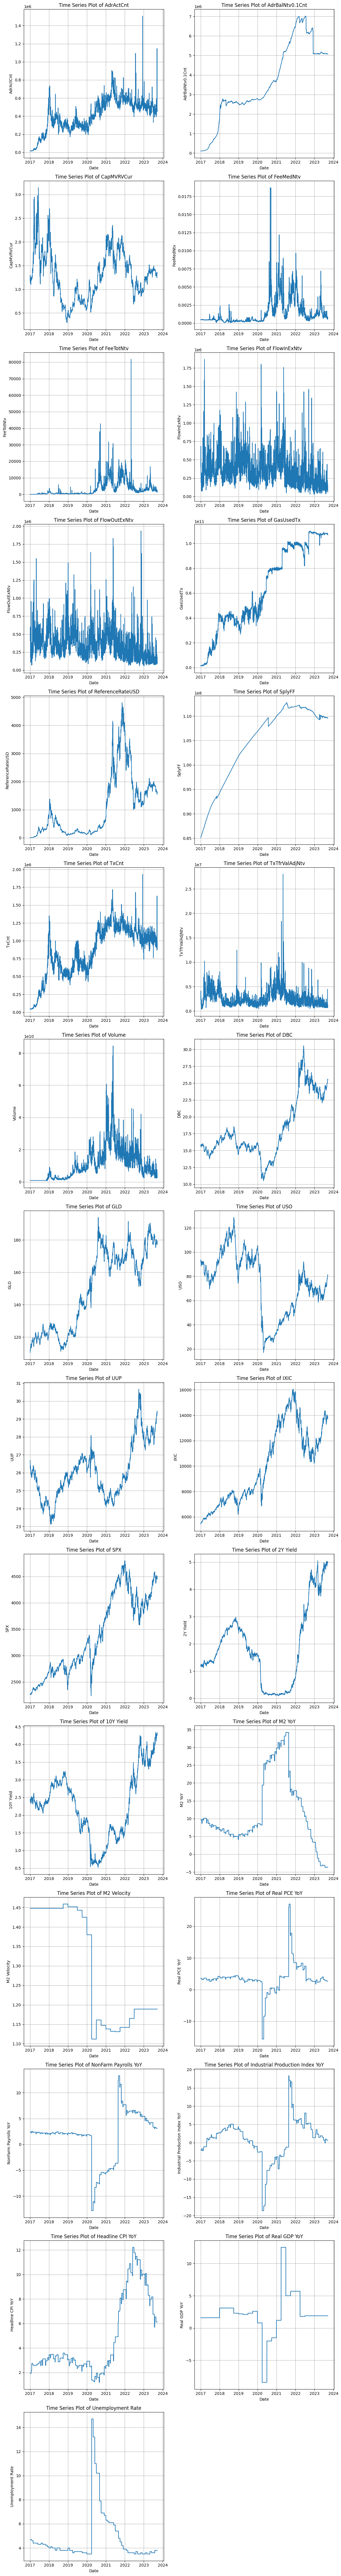

In [ ]:
#Let's take a look at each column

# Get the list of column names
columns_to_plot = eth_df.columns

# Calculate the number of rows and columns for the subplots grid
num_plots = len(columns_to_plot)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Create a 2D array of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Loop through the 2D array of axes
for row in range(num_rows):
    for col in range(num_cols):
        ax = axes[row, col]

        # Calculate the index of the current column
        i = row * num_cols + col

        # Check if we've exceeded the number of columns to plot
        if i < num_plots:
            column = columns_to_plot[i]

            # Create a line plot using Matplotlib directly
            ax.plot(eth_df.index, eth_df[column])

            ax.set_title(f'Time Series Plot of {column}')
            ax.set_xlabel('Date')
            ax.set_ylabel(column)
            ax.grid(True)
        else:
            # If we exceed the number of columns to plot, hide the empty subplot
            fig.delaxes(ax)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()






In [ ]:
#Saving eth_df and btc_df into csv files

# Reset the index and include it as a separate column in the DataFrame
eth_df_reset = eth_df.reset_index()

# Save the DataFrame with the index as a separate column in the CSV file
eth_df_reset.to_csv('eth_data.csv', index=False)

# Reset the index and include it as a separate column in the DataFrame
btc_df_reset = btc_df.reset_index()

# Save the DataFrame with the index as a separate column in the CSV file
btc_df_reset.to_csv('btc_data.csv', index=False)

from google.colab import drive
drive.mount('/content/drive')

import shutil

# Define the source and destination paths
source_path_eth = 'eth_data.csv'
destination_path_eth = '/content/drive/My Drive/Colab Notebooks/Coinmetrics Data/eth_data.csv'

source_path_btc = 'btc_data.csv'
destination_path_btc = '/content/drive/My Drive/Colab Notebooks/Coinmetrics Data/btc_data.csv'

# Move the files to Google Drive
shutil.move(source_path_eth, destination_path_eth)
shutil.move(source_path_btc, destination_path_btc)


Mounted at /content/drive


'/content/drive/My Drive/Colab Notebooks/Coinmetrics Data/btc_data.csv'